# アルゴリズムの発見の流れ
- ①特徴的な変数の考察
- ②特徴量を考える。
- ③アルゴリズムの実装

In [35]:
#データの読み込み
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF
import seaborn as sns

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")

train.index = pd.to_datetime(train["datetime"])

train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [3]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [85]:
train["remarks"] = train["remarks"].fillna("なし")
train["event"] = train["event"].fillna("なし")
train["payday"] = train["payday"].fillna(0)
train["precipitation"] = train["precipitation"].apply(lambda x : -1 if x == "--" else float(x) )
train["month"] = train["datetime"].apply(lambda x :int(x.split("-")[1]))

In [86]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,fun,curry,chiken,days,pred,month
datetime,,,,,,,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,なし,なし,0.0,快晴,-1.0,19.8,0,0,0,0,130.829431,11
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,なし,なし,0.0,快晴,-1.0,17.0,0,0,0,1,130.400245,11
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,なし,なし,0.0,快晴,-1.0,15.5,0,0,0,2,129.971058,11
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,なし,なし,0.0,快晴,-1.0,15.2,0,0,0,3,129.541871,11
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,なし,なし,0.0,快晴,-1.0,16.1,0,0,0,4,129.112684,11


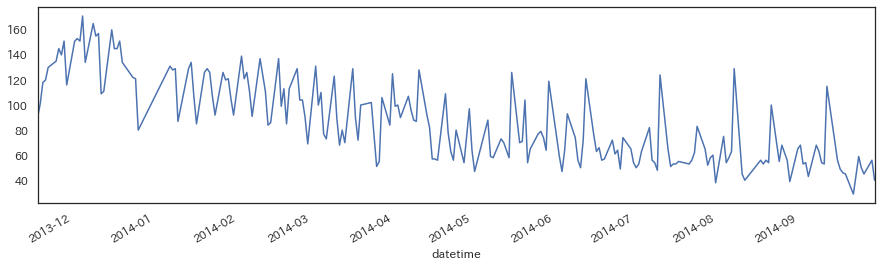

In [87]:
train["y"].plot(figsize=(15,4))

In [90]:
train[train["month"]==1].sort_values(by="y")

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,fun,curry,chiken,days,pred,month
datetime,,,,,,,,,,,,,,,,,,
2014-01-17,2014-1-17,85,金,1,回鍋肉,430.0,なし,ママの会,0.0,快晴,-1.0,7.8,0,0,0,35,115.807893,1
2014-01-10,2014-1-10,87,金,0,手作りロースカツ,440.0,なし,なし,1.0,快晴,-1.0,5.1,0,0,0,31,117.524640,1
2014-01-31,2014-1-31,92,金,1,メダイ照り焼,460.0,なし,なし,0.0,快晴,-1.0,14.1,0,0,0,45,111.516024,1
2014-01-24,2014-1-24,92,金,1,鶏のレモンペッパー焼orカレー,418.0,鶏のレモンペッパー焼（50食）、カレー（42食）,なし,0.0,快晴,-1.0,10.1,0,1,0,40,113.661958,1
2014-01-30,2014-1-30,105,木,1,鶏の唐揚げ,448.0,なし,なし,0.0,曇,-1.0,15.3,0,0,0,44,111.945211,1
2014-01-16,2014-1-16,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,なし,なし,0.0,快晴,-1.0,7.0,0,0,0,34,116.237079,1
2014-01-23,2014-1-23,107,木,0,酢豚,400.0,なし,なし,0.0,快晴,-1.0,8.5,0,0,0,39,114.091145,1
2014-01-28,2014-1-28,120,火,0,海老フライタルタル,445.0,なし,なし,0.0,快晴,-1.0,12.6,0,0,0,42,112.803585,1
2014-01-29,2014-1-29,121,水,1,チーズ入りメンチカツ,450.0,なし,なし,0.0,快晴,-1.0,10.3,0,0,0,43,112.374398,1


- 年月が経つにつれて平均的に下がっている印象（⇒線形モデルに応用できそう）

### 相関関係の確認
- それぞれの変数と売り上げの相関関係の確認。
- 今回は、変数が数値のものは散布図、ステータスのものは箱ひげ図で表す。

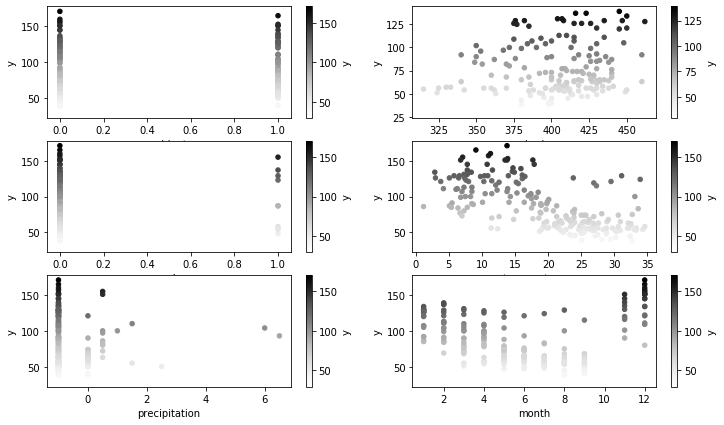

In [7]:
fig,ax = plt.subplots(3,2,figsize=(12,7))

train.plot.scatter(x="soldout",y="y",ax=ax[0][0],c=1)
train.plot.scatter(x="kcal",y="y",ax=ax[0][1],c=1)
train.plot.scatter(x="payday",y="y",ax=ax[1][0],c=1)
train.plot.scatter(x="temperature",y="y",ax=ax[1][1],c=1)
train.plot.scatter(x="precipitation",y="y",ax=ax[2][0],c=1)
train.plot.scatter(x="month",y="y",ax=ax[2][1],c=1)

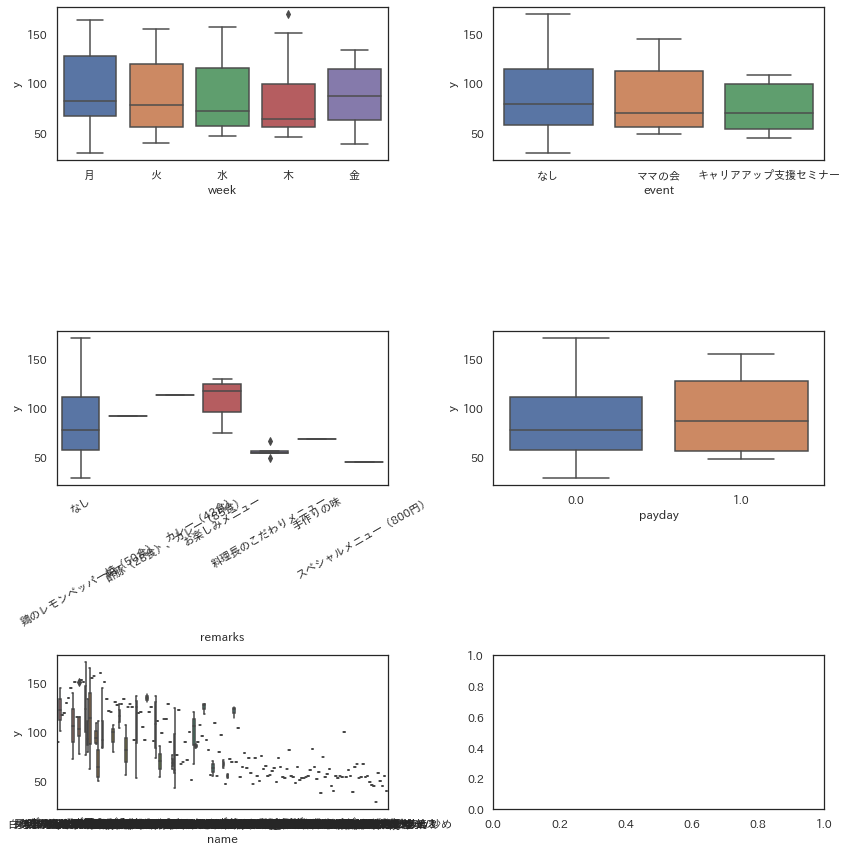

In [8]:
sns.set(font="IPAexGothic",style="white")#日本語の指定
fig, ax = plt.subplots(3,2,figsize=(12,12))

sns.boxplot(x="week",y="y",data=train,ax=ax[0][0])
sns.boxplot(x="event",y="y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="y",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=30)
sns.boxplot(x="payday",y="y",data=train,ax=ax[1][1])
sns.boxplot(x="name",y="y",data=train,ax=ax[2][0])
plt.tight_layout()

In [9]:
train["remarks"].value_counts()

なし                          186
お楽しみメニュー                     12
料理長のこだわりメニュー                  5
酢豚（28食）、カレー（85食）              1
手作りの味                         1
鶏のレモンペッパー焼（50食）、カレー（42食）      1
スペシャルメニュー（800円）               1
Name: remarks, dtype: int64

In [11]:
train.sort_values(by="y")

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month
datetime,,,,,,,,,,,,,
2014-09-22,2014-9-22,29,月,0,筑前煮,395.0,なし,なし,0.0,晴れ,-1.0,25.2,9
2014-08-01,2014-8-1,38,金,0,豚肉の生姜焼き,380.0,なし,なし,0.0,薄曇,-1.0,32.7,8
2014-08-29,2014-8-29,39,金,0,チキンの辛味噌焼き,398.0,なし,なし,0.0,曇,0.0,25.1,8
2014-09-30,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,なし,なし,0.0,快晴,-1.0,28.1,9
2014-08-12,2014-8-12,40,火,1,厚切ハムカツ,400.0,なし,なし,0.0,雨,0.0,29.4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-10,2013-12-10,155,火,0,やわらかロースのサムジョン,NaN,なし,なし,1.0,曇,0.5,7.1,12
2013-12-11,2013-12-11,157,水,0,五目御飯,NaN,なし,なし,0.0,曇,-1.0,11.0,12
2013-12-16,2013-12-16,160,月,0,カキフライタルタル,NaN,なし,なし,0.0,快晴,-1.0,11.3,12


In [20]:
train[train["y"] < 57]["name"].value_counts()

タンドリーチキン          2
鶏肉のカレー唐揚          1
プルコギ              1
チキンフリカッセ          1
メンチカツ             1
ランチビュッフェ          1
カレイ唐揚げ夏野菜あん       1
バーベキューチキン         1
洋食屋さんのメンチカツ       1
チキンのコーンクリーム焼き     1
たっぷりベーコンフライ       1
鶏の天ぷら             1
チキンの辛味噌焼き         1
厚切ハムカツ            1
サーモンのムニエル2色ソース    1
筑前煮               1
豚肉と玉子の炒め          1
エビフライ             1
肉団子クリームシチュー       1
チキン南蛮             1
チキンステーキ・きのこソース    1
アジ唐揚げ南蛮ソース        1
手作りチキンカツ          1
カレイ唐揚げ 甘酢あん       1
豚肉の生姜焼き           1
ぶりレモンペッパー焼き       1
チーズメンチカツ          1
鶏の味噌漬け焼き          1
カレイ唐揚げ野菜餡かけ       1
白身魚フライ            1
牛スキヤキ             1
牛カルビ焼き肉           1
鶏肉とカシューナッツ炒め      1
豚冷シャブ野菜添え         1
鶏の照り焼きマヨ          1
豚ロースのピザ風チーズ焼き     1
八宝菜               1
親子煮               1
キスと野菜の天ぷら         1
厚切イカフライ           1
白身魚の南部焼き          1
チンジャオロース          1
チャプチェ             1
豚肉の胡麻シャブ          1
白身魚ムニエル           1
豚すき焼き             1
サーモンフライ・タルタル      1
ロース甘味噌焼き          1
かじきの甘辛煮           1
Name: name, dtype: i

In [18]:
train[train["y"] > 113]["name"].value_counts()

チキンカレー           3
ポークカレー           3
鶏の唐揚げおろしソース      2
チンジャオロース         2
ハンバーグカレーソース      2
鶏チリソース           1
ジューシーメンチカツ       1
タルタルinソーセージカツ    1
ハンバーグデミソース       1
白身魚唐揚げ野菜あん       1
手作りひれかつとカレー      1
海老フライタルタル        1
鶏の唐揚             1
ハンバーグ            1
さわら焼味噌掛け         1
豚肉の生姜焼           1
マーボ豆腐            1
手作りヒレカツ          1
やわらかロースのサムジョン    1
回鍋肉              1
さっくりメンチカツ        1
ビッグメンチカツ         1
ボローニャ風カツ         1
カキフライタルタル        1
カレー入りソーセージカツ     1
鶏の照り焼きマスタード      1
キーマカレー           1
鶏のカッシュナッツ炒め      1
サバ焼味噌掛け          1
五目御飯             1
海老クリーミ―クノーデル     1
クリームチーズ入りメンチ     1
手ごね風ハンバーグ        1
メンチカツ            1
鶏の唐揚げ甘酢あん        1
さんま辛味焼           1
若鶏ピリ辛焼           1
チーズ入りメンチカツ       1
ポーク味噌焼き          1
ポークハヤシ           1
厚揚げ豚生姜炒め         1
豚のスタミナ炒め         1
手作りロースカツ         1
鶏のピリ辛焼き          1
Name: name, dtype: int64

- kcalとtemperatureは相関関係がありありそう
- お楽しみメニューの時は極端に低い傾向にある。
- カレーが75%以上に多い、またチキンは25%以下に多い

In [37]:
train["fun"] = train["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
train["curry"] = train["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
train["chiken"] = train["name"].apply(lambda x : 1 if x.find("チキン")>=0 else 0)
train["days"] = [i for i in range(len(train))]

In [80]:
model1 = LR()
train_X1, train_Y = train["days"].values.reshape(-1,1), train["y"]
model1.fit(train_X1, train_Y)

model2 = RF(n_estimators=100,max_depth=4,random_state=777)
train_X2 = pd.get_dummies(train[["temperature", "fun", "curry", "chiken","weather"]])
train["pred"] = model1.predict(train_X1)
train_Y2 = train["y"] - train["pred"]
model2.fit(train_X2, train_Y2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=777, verbose=0,
                      warm_start=False)

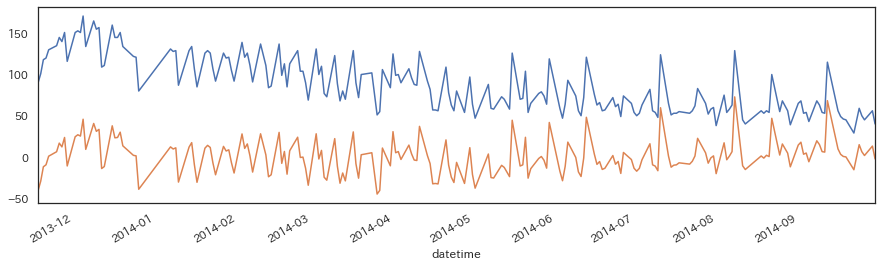

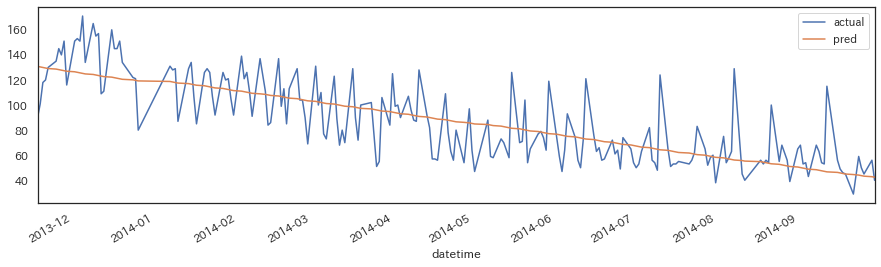

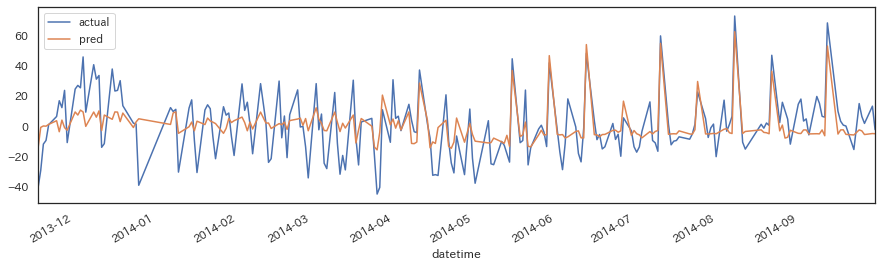

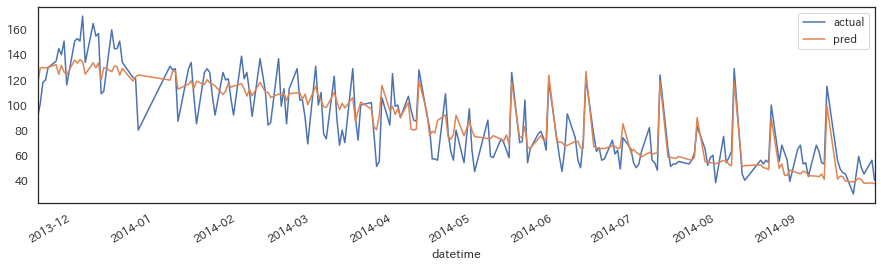

In [81]:
train["y"].plot(figsize=(15,4))
train_Y2.plot(figsize=(15,4))
v =  model1.predict(train_X1)
p0 = pd.DataFrame({"actual":train_Y,"pred":v})
p0.plot(figsize=(15,4))
v =  model2.predict(train_X2)
p1 = pd.DataFrame({"actual":train_Y2,"pred":v})
p1.plot(figsize=(15,4))

v =  model1.predict(train_X1) + model2.predict(train_X2)
p2 = pd.DataFrame({"actual":train_Y,"pred":v})
p2.plot(figsize=(15,4))
plt.legend()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1
5,2014-10-8,水,0,完熟トマトのホットカレー,420.0,NaN,NaN,NaN,晴れ,--,23.3
6,2014-10-9,木,0,豚キムチ炒め,435.0,NaN,キャリアアップ支援セミナー,NaN,曇,--,22.5
7,2014-10-10,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,1.0,薄曇,--,26.1
8,2014-10-14,火,0,若鶏梅肉包揚げ,408.0,NaN,NaN,NaN,快晴,--,26.8
9,2014-10-15,水,1,ミックスグリル,450.0,料理長のこだわりメニュー,NaN,NaN,雨,1.5,15.6
